In [1]:
# Note that this works in the segment version with temperature dependant properties
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from Segment import Segment

In [2]:
def lsimple(base, a):
    def lm(temp):
        return base + a * temp
    return lm

def lsp(base, a, tset):
    def lm(temp):
        return base + a * (temp - tset)
    return lm

def lsp_10(base, a, tset):
    def lm(temp):
        return base + (.1 * a * base * (temp - tset))
    return lm 

In [3]:
# Now building a body out of the segments 

body = Segment(171380, 
               lsp_10(4.305, 1, 35.0), 
               lsp_10(59.539, -1, 35.0), "Torso")
body.add_child(51.70, Segment(17556.0, 
                              lsp_10(13.423, 1, 36.1), 
                              lsp_10(17.3, -1, 36.1), "Head"))
body.add_child(5.45, 
               Segment(9041.34, 
                       lsp_10(0.814, 1, 34.4),
                       lsp_10(1.264, -1, 34.4), "LUArm").add_child(2.65,
               Segment(5739.14, 
                       lsp_10(0.534, 1, 34.9),
                       lsp_10(0.271, -1, 34.9), "LFArm").add_child(1.20,
               Segment(1400.3, 
                       lsp_10(0.369, 1, 35.3),
                       lsp_10(0.140, -1, 35.3), "LHand"))))
body.add_child(5.45, 
               Segment(9041.34, 
                       lsp_10(0.814, 1, 34.4),
                       lsp_10(1.264, -1, 34.4), "RUArm").add_child(2.65,
               Segment(5739.14, 
                       lsp_10(0.534, 1, 34.9),
                       lsp_10(0.271, -1, 34.9), "RFArm").add_child(1.20,
               Segment(1400.3, 
                       lsp_10(0.369, 1, 35.3),
                       lsp_10(0.140, -1, 35.3), "RHand"))))
body.add_child(2.72, 
               Segment(29314.3, 
                       lsp_10(1.640, 1, 34.8), 
                       lsp_10(1.440, -1, 34.8), "LThigh").add_child(0.85,
               Segment(13973.7, 
                       lsp_10(0.879, 1, 34.3),
                       lsp_10(0.380, -1, 34.3), "LLeg").add_child(0.56,
               Segment(2006.4, 
                       lsp_10(0.456, 1, 34.6),
                       lsp_10(0.313, -1, 34.6), "LFoot"))))
body.add_child(2.72, 
               Segment(29314.3, 
                       lsp_10(1.640, 1, 34.8), 
                       lsp_10(1.440, -1, 34.8), "RThigh").add_child(0.85,
               Segment(13973.7, 
                       lsp_10(0.879, 1, 34.3),
                       lsp_10(0.380, -1, 34.3), "RLeg").add_child(0.56,
               Segment(2006.4, 
                       lsp_10(0.456, 1, 34.6),
                       lsp_10(0.313, -1, 34.6), "RFoot"))))

In [4]:
import copy

In [5]:
body_cp = copy.deepcopy(body)

In [6]:
tvals = []
for i in range(100000):
    A = body_cp.coeff_mat(1)
    c = body_cp.get_const(1, 0)
    ntemps = list(np.linalg.inv(A) @ c) # invert the matrix, finding temperatures
    tvals.append(copy.copy(ntemps))
    body_cp.set_temps(ntemps)

In [7]:
tvals = np.array(tvals)

In [8]:
names = body_cp.get_names() 

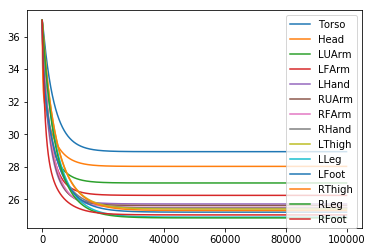

In [9]:
fig_t = plt.figure()
ax_t = fig_t.add_subplot(111)
for i, name in enumerate(names):
    ax_t.plot(tvals[:,i], label=name)

ax_t.legend()

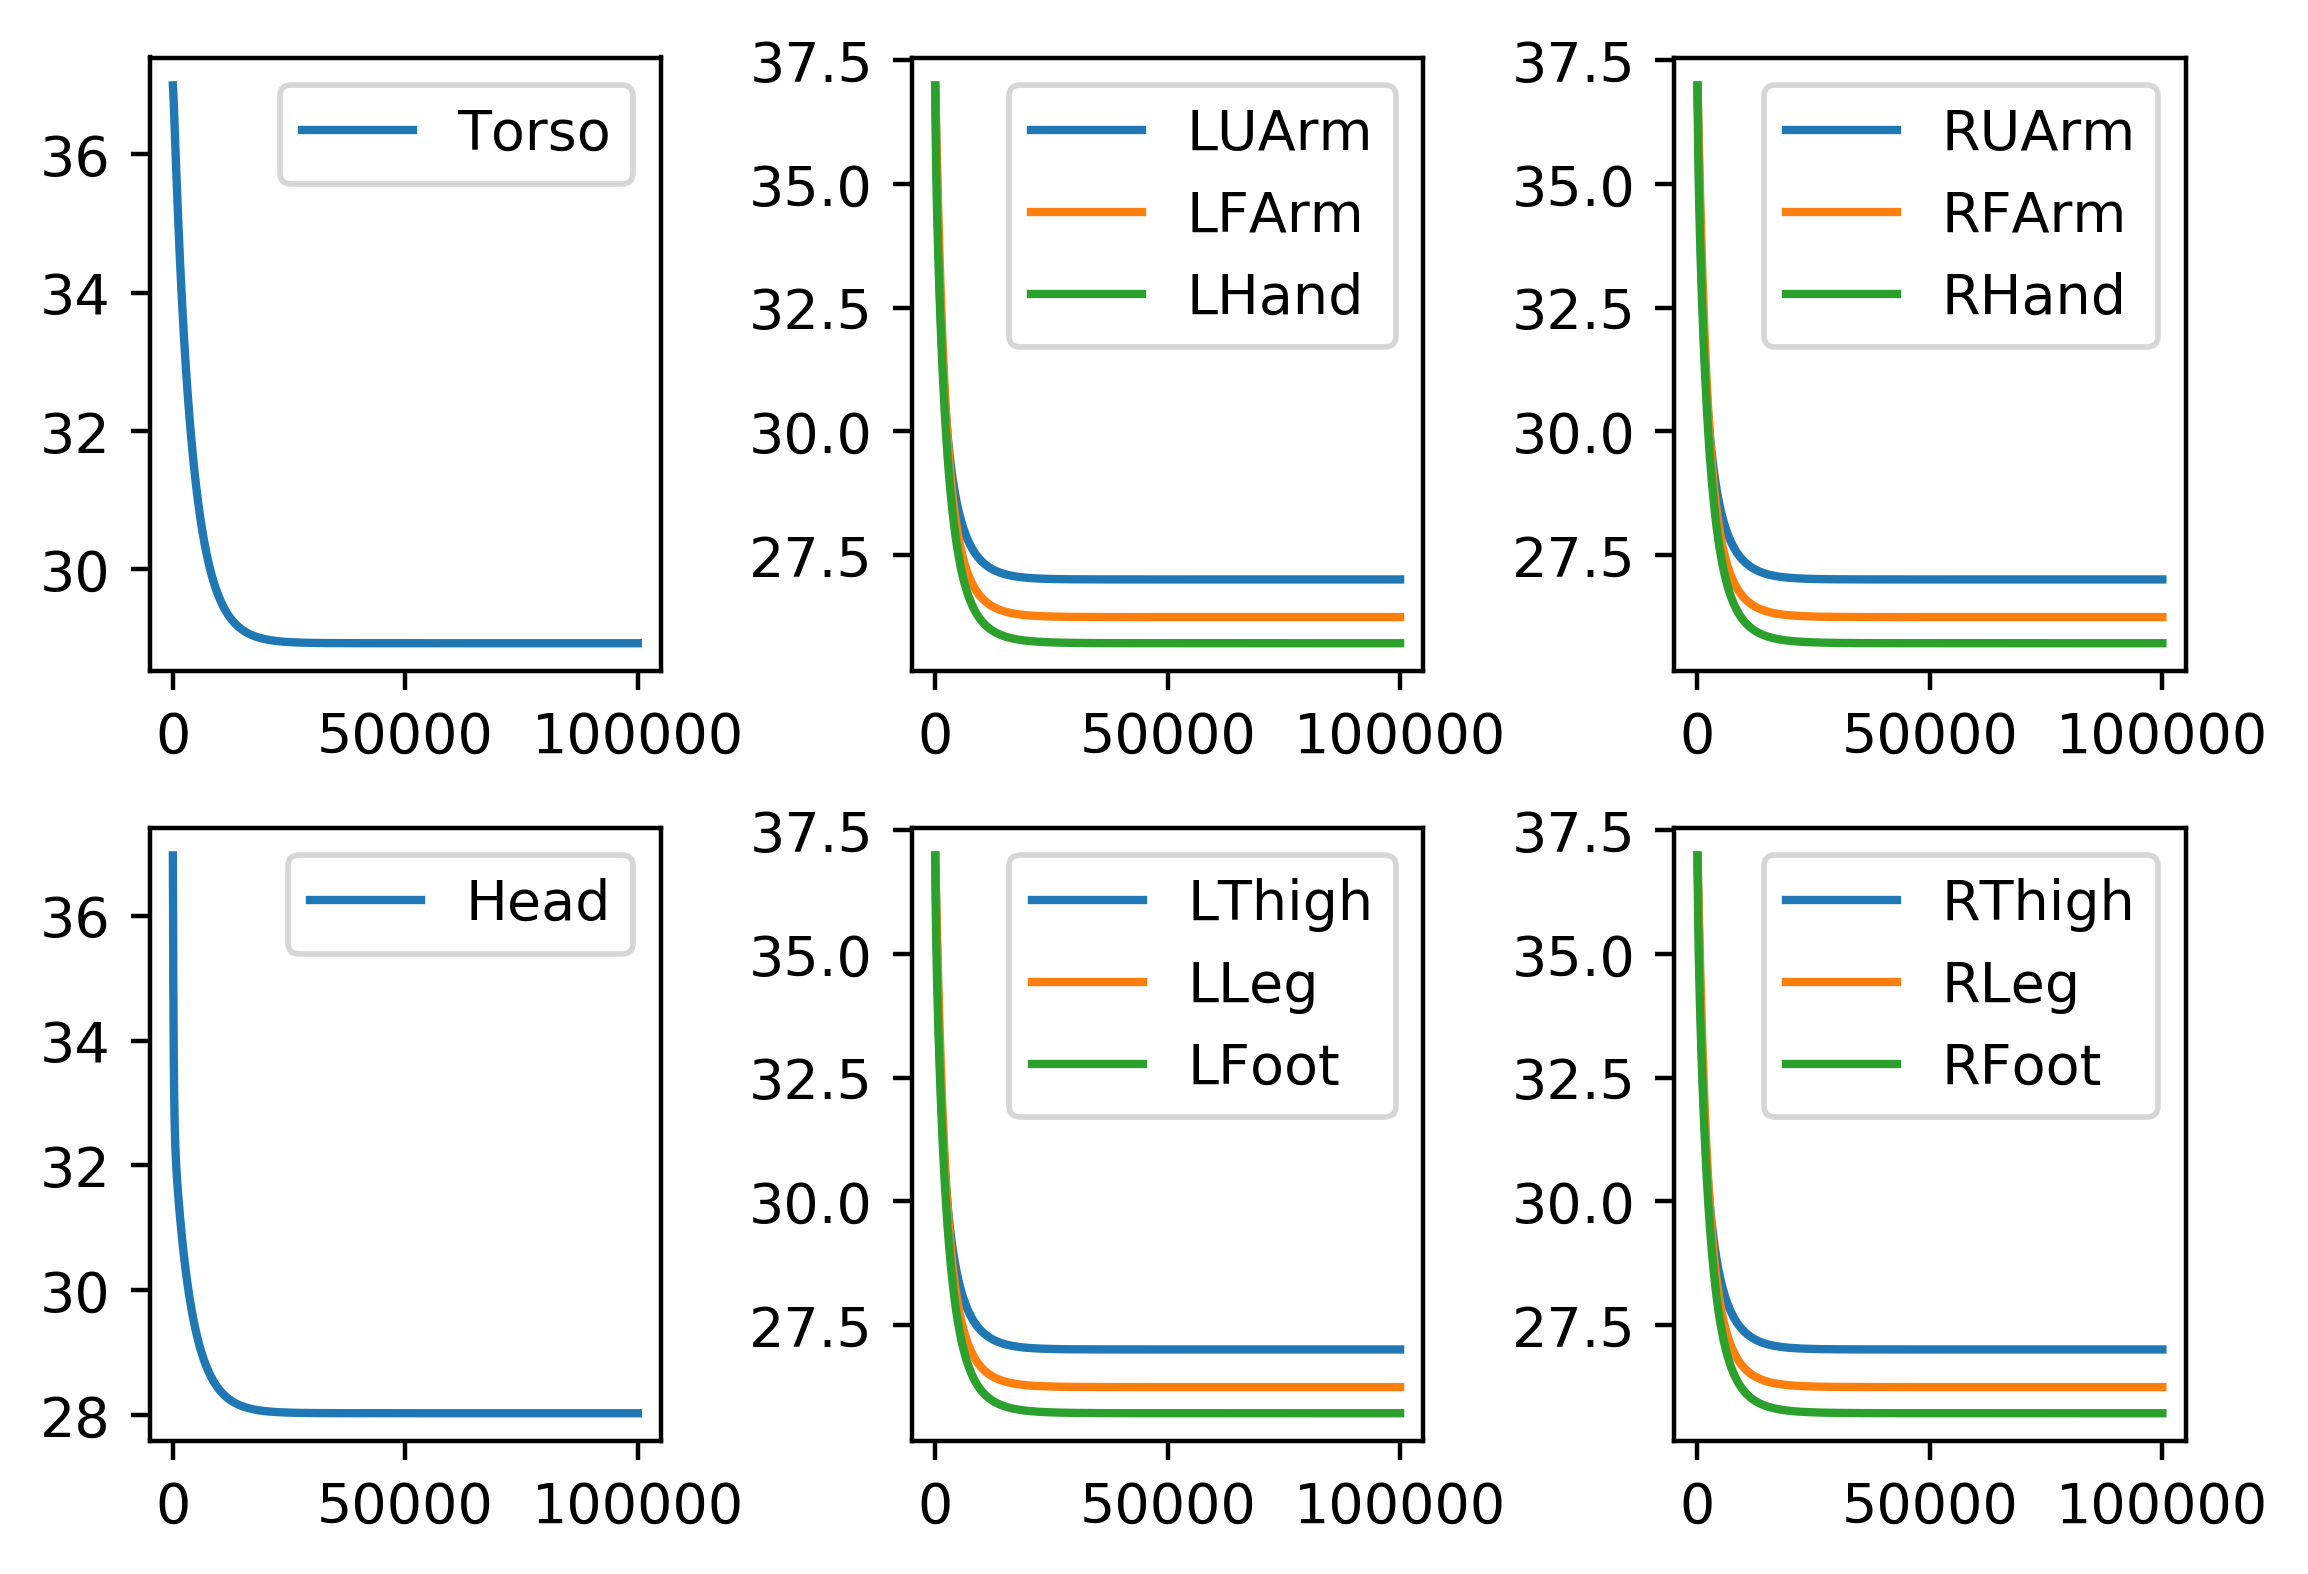

In [10]:
fig_p = plt.figure(dpi=400)

# Torso plot
ax_t = fig_p.add_subplot(231)
ax_t.plot(tvals[:,0], label=names[0])
ax_t.legend()

# Head plot
ax_h = fig_p.add_subplot(234)
ax_h.plot(tvals[:,1], label=names[1])
ax_h.legend()

# Left Arm
ax_la = fig_p.add_subplot(232)
for i, name in enumerate(names[2:5]):
    ax_la.plot(tvals[:,2+i], label=name)
ax_la.legend()

# Right Arm
ax_ra = fig_p.add_subplot(233)
for i, name in enumerate(names[5:8]):
    ax_ra.plot(tvals[:,2+i], label=name)
ax_ra.legend()

# Left Leg
ax_ll = fig_p.add_subplot(235)
for i, name in enumerate(names[8:11]):
    ax_ll.plot(tvals[:,2+i], label=name)
ax_ll.legend()

# Right Leg
ax_rl = fig_p.add_subplot(236)
for i, name in enumerate(names[11:]):
    ax_rl.plot(tvals[:,2+i], label=name)
ax_rl.legend()

fig_p.tight_layout()